코드 1-1

In [ ]:
"""
이 쥬피터노트북에서는 수정한 matplotlibrc 파일을 사용하고 있습니다. 이 파일에서는
matplotlib 작도를 위한  고유한 스타일을 제공합니다. 이 쥬피터노트북을 사용하고 
노트북의 스타일을 사용하고 싶다면 두 가지 방법이 있습니다.
1. 여러분의 matplotlibrc 파일을 책에서 제공하는 파일로 교체하세요. 자세한 방법은
http://matplotlib.org/users/customizing.html에서 확인하세요

2. bmh_matplotlibrc.json파일에도 스타일이 가능합니다. 이 방법은 현재의 노트북의 
스타일만 업데이트 합니다. 다음과 같은 코드를 추가해보세요
        import json, matplotlib
        s = json.load( open("../styles/bmh_matplotlibrc.json") )
        matplotlib.rcParams.update(s)
        
** 책에는 없는 코드라서 무시하셔도 될 듯합니다
"""

# The code below can be passed over, as it is currently not important, plus it
# uses advanced topics we have not covered yet. LOOK AT PICTURE, MICHAEL!

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 12

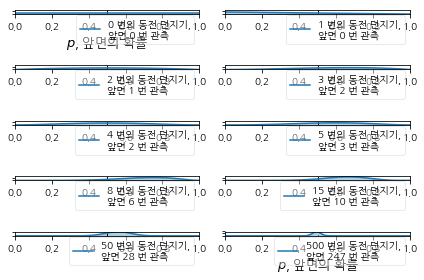

In [4]:

import scipy.stats as stats

dist     = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data     = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, 앞면의 확률", fontsize=13) \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="%d 번의 동전 던지기,\n앞면 %d 번 관측" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


#plt.suptitle("사후확률의 베이지안 업데이트",y=1.02,fontsize=14)

plt.tight_layout()
plt.show()

코드 1-2


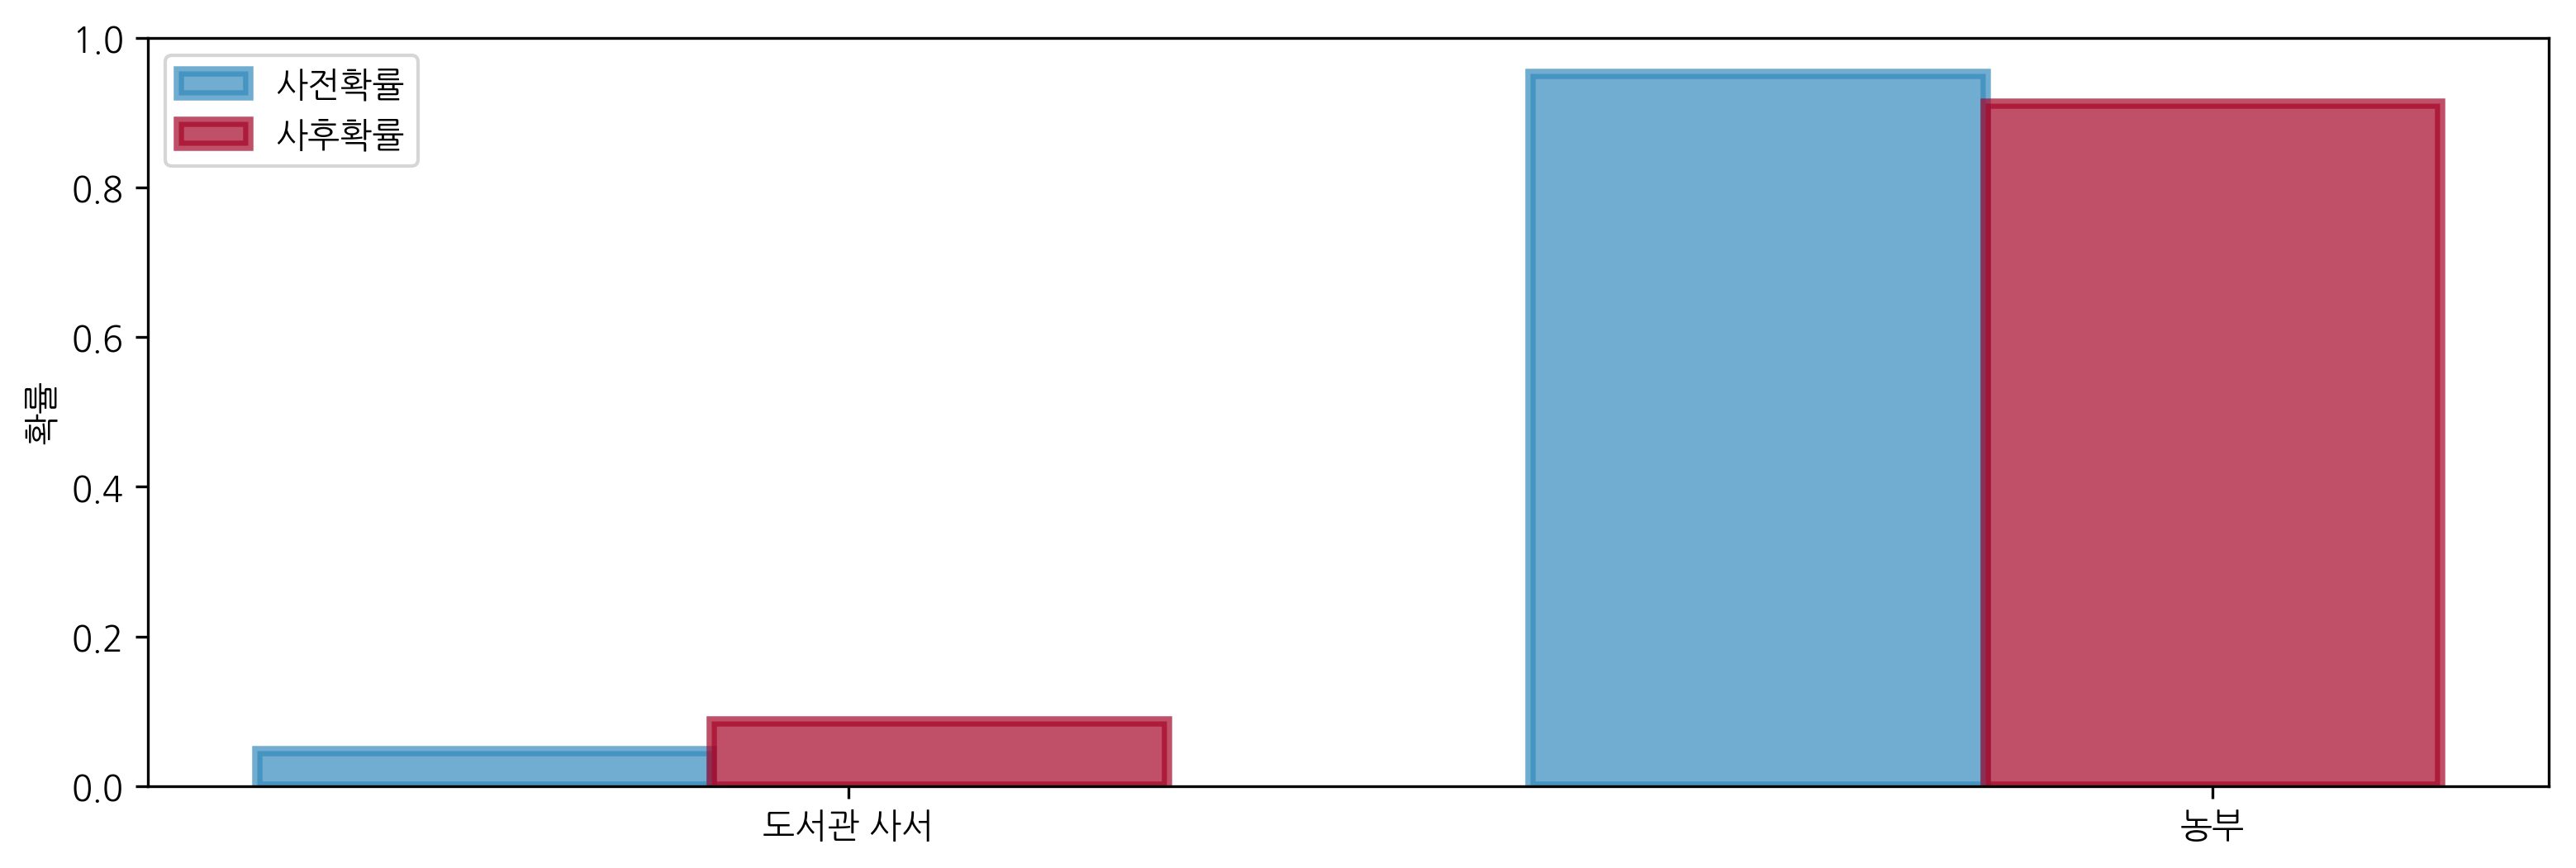

In [3]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
colors = ["#348ABD", "#A60628"]
prior = [1/21., 20/21.]
posterior = [0.087,1-0.087]
plt.bar([0, .7], prior, alpha=0.70, width=0.25,
color=colors[0], label="사전확률",
lw="3", edgecolor="#348ABD")
plt.bar([0+0.25, .7+0.25], posterior, alpha=0.7,
width=0.25, color=colors[1],
label="사후확률",
lw="3", edgecolor="#A60628")
plt.xticks([0.20, 0.95], ["도서관 사서", "농부"])
#plt.title("스티브 직업에 대한 사전과 사후확률분포")
plt.ylabel("확률")
plt.legend(loc="upper left");

Text(0.5,0,'$k$')

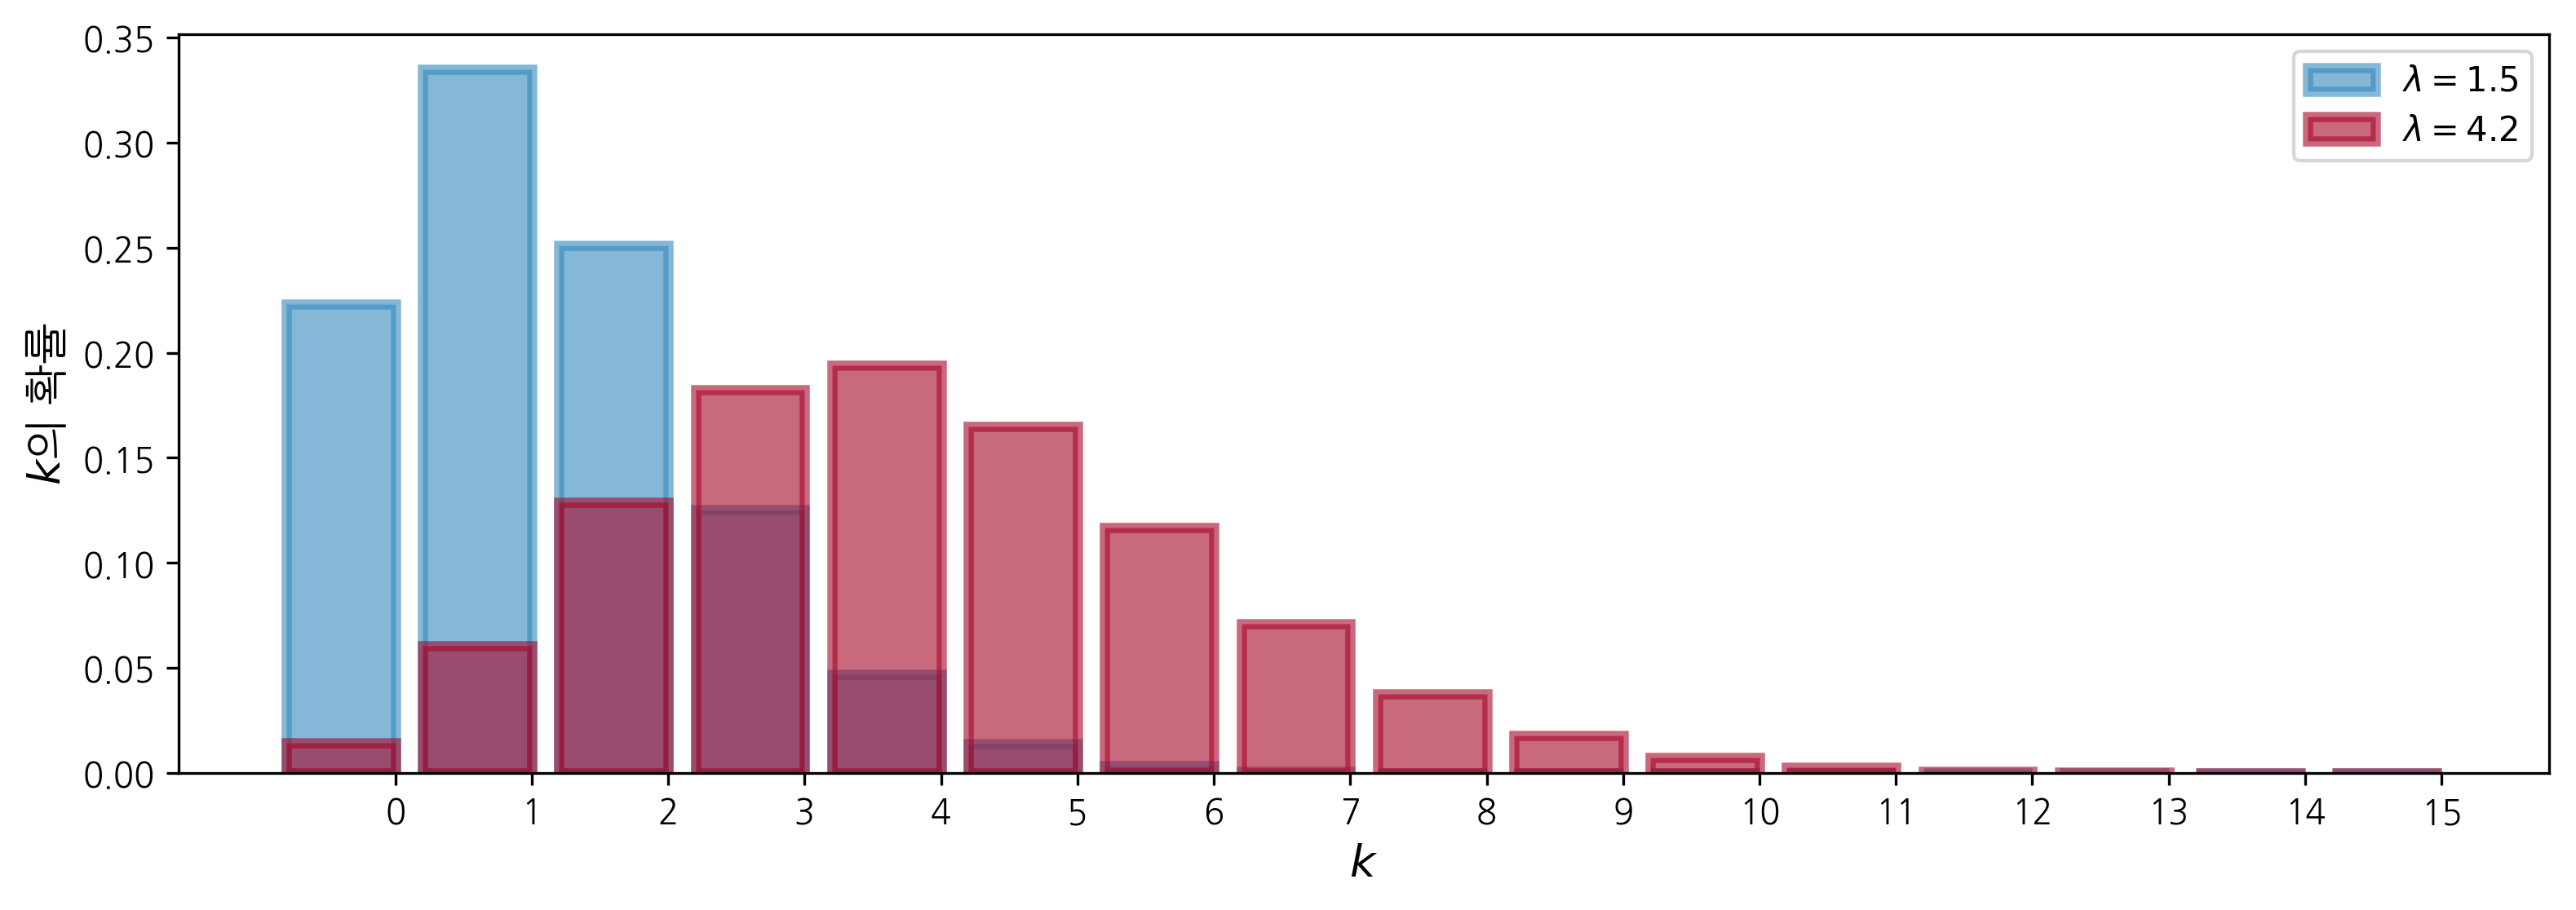

In [4]:
figsize(12.5, 4)

import scipy.stats as stats
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("$k$의 확률", fontsize=13)
plt.xlabel("$k$", fontsize=13)
#plt.title("$\lambda$값을 달리하여 만든 포아송 랜덤변수의 확률질량함수")

(0, 1.2)

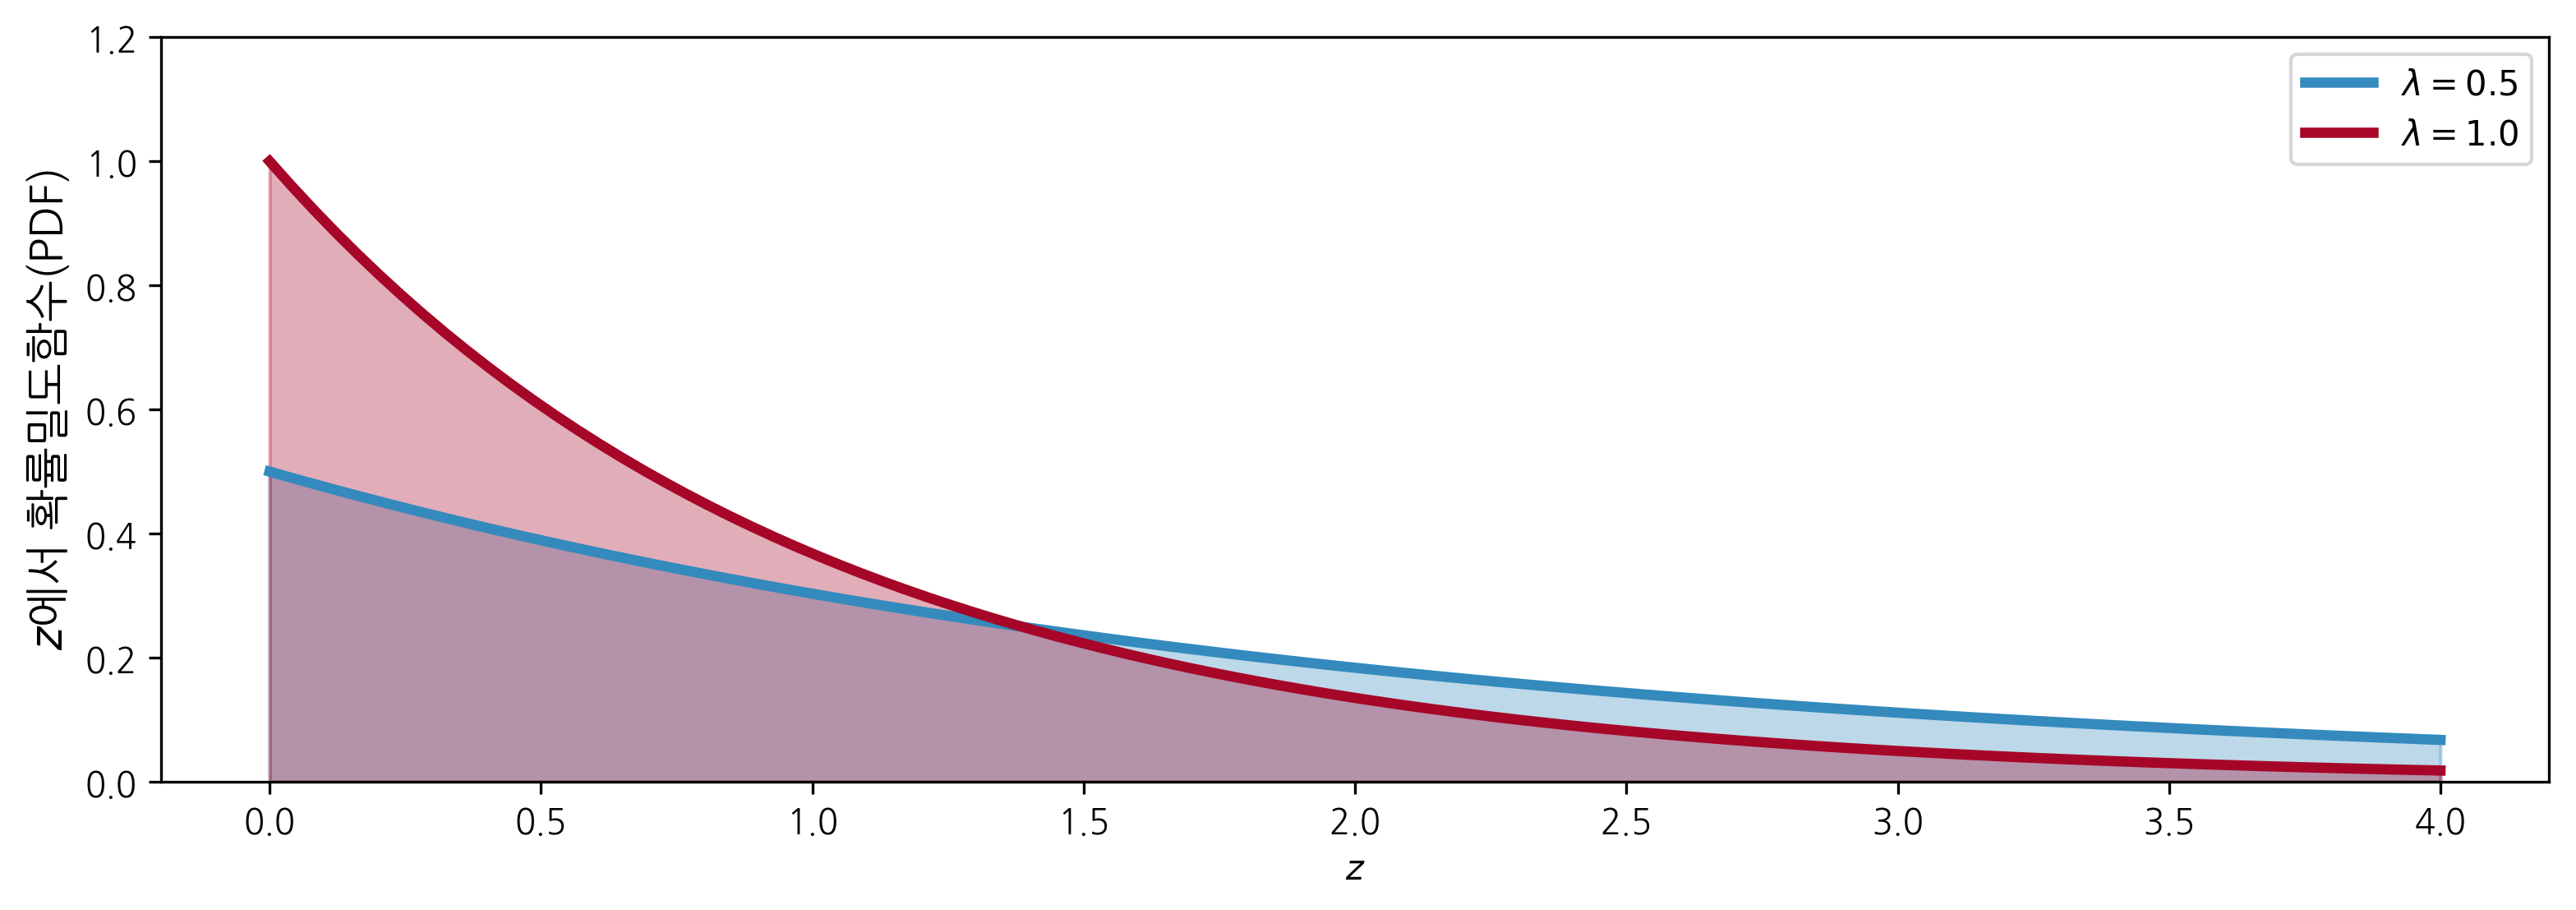

In [5]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1. / l), lw=3,
             color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1. / l), color=c, alpha=.33)

plt.legend()
plt.ylabel("$z$에서 확률밀도함수(PDF)",fontsize=13)
plt.xlabel("$z$")
plt.ylim(0, 1.2)
#plt.title("여러 $\lambda$값에 따른 지수랜덤변수의 확률밀도함수");

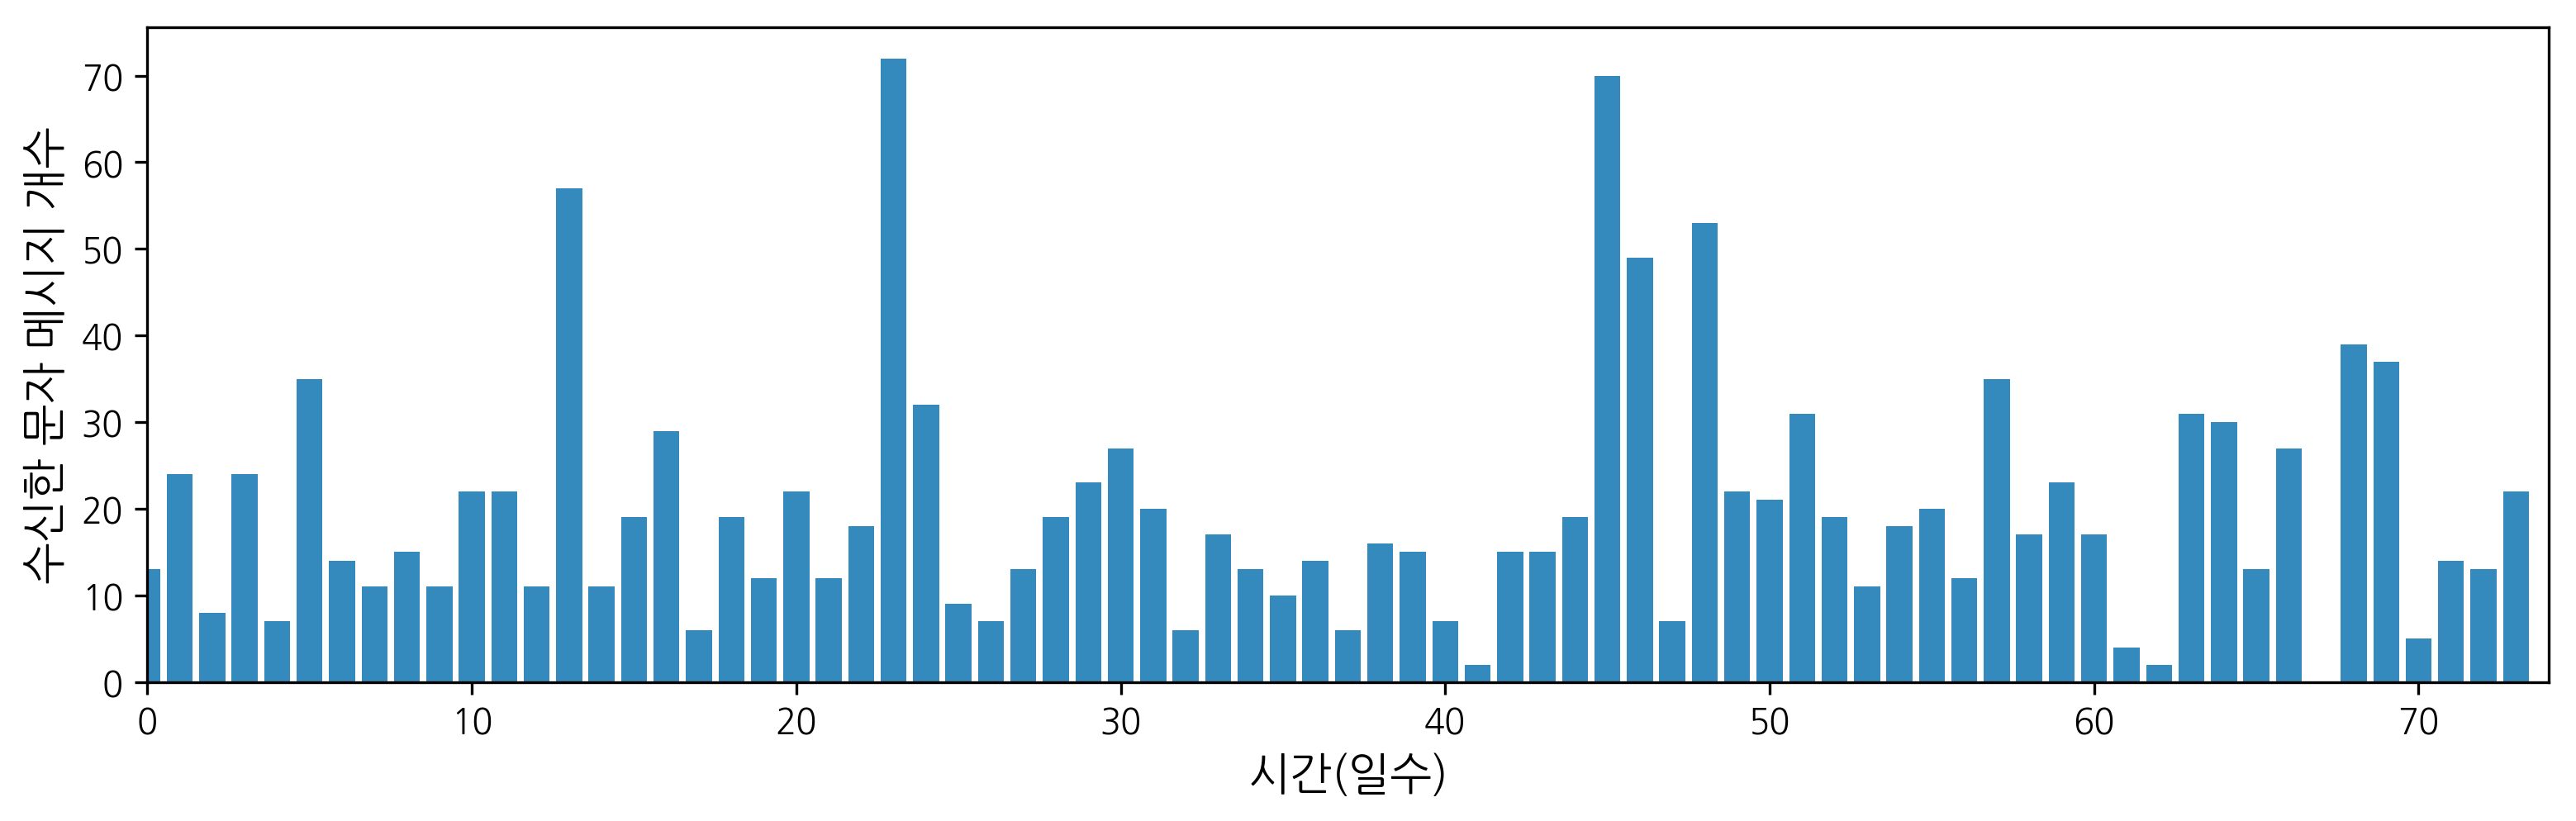

In [6]:
figsize(12.5, 3.5)

#원문 코드
#count_data = np.loadtxt(r"data\txtdata.csv")
#실습 코드
count_data = np.loadtxt("./data/txtdata.csv")

n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("시간(일수)",fontsize=13)
plt.ylabel("수신한 문자 메시지 개수",fontsize=13)
#plt.title("사용자의 메시징 습관이 시간에 따라 변하는가?")
plt.xlim(0, n_count_data);

In [7]:
import pymc as pm

alpha = 1.0 / count_data.mean()  # count_data 변수는 문자메시지 갯수를
                               # 저장하고 있다
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)

tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

In [8]:
print("Random output:", tau.random(), tau.random(), tau.random())

Random output: 48 59 24


In [9]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1  # lambda1은 tau 이전 lambda이다
    out[tau:] = lambda_2  # lambda2는 tau 이후 lambda이다
    return out

In [10]:
observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)

model = pm.Model([observation, lambda_1, lambda_2, tau])

In [11]:
# 3장에서 이 코드를 설명할 것이다
# we will get
# 30,000 (40,000 minus 10,000) samples back.
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)

 [-----------------100%-----------------] 40000 of 40000 complete in 5.7 sec

In [12]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

/home/markbaum/Python/django/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


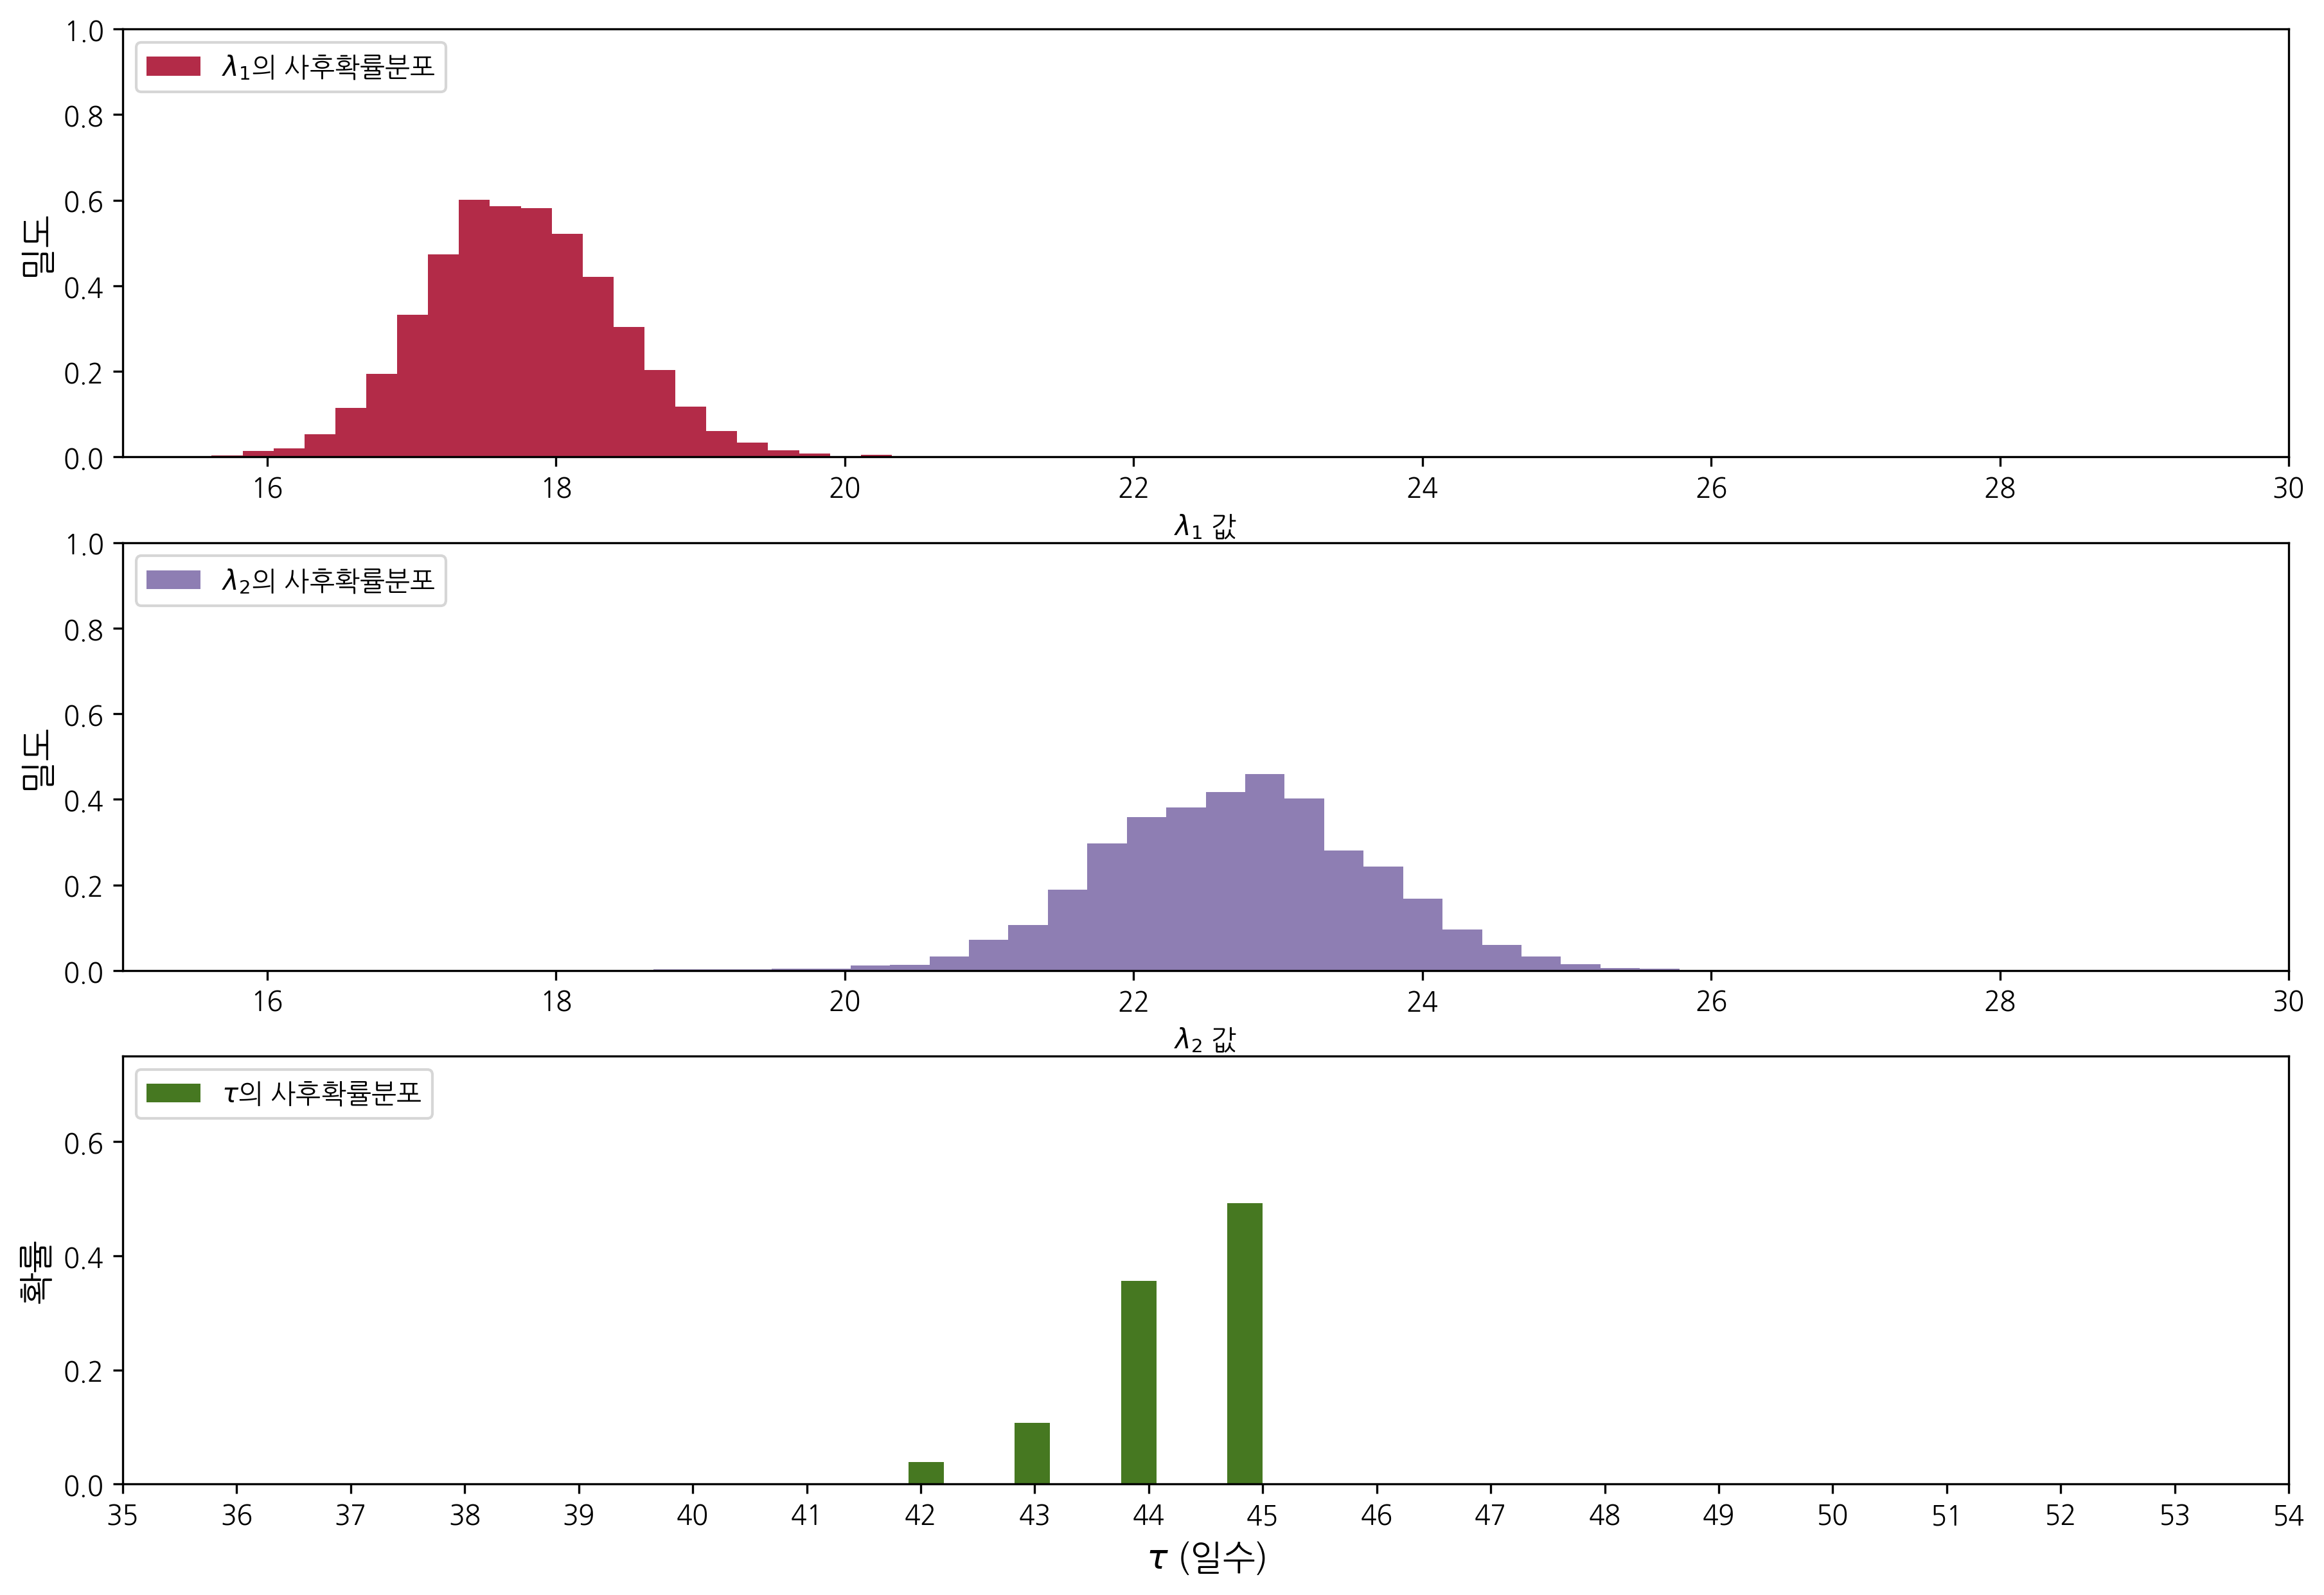

In [13]:
figsize(14.5, 10)
# 표본의 히스토그램:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$\lambda_1$의 사후확률분포", color="#A60628", normed=True)
plt.legend(loc="upper left")
#plt.title(r"""모수 $\lambda_1,\;\lambda_2,\;\tau$의 사후확률분포""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ 값")
plt.ylabel("밀도", fontsize=13)
ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$\lambda_2$의 사후확률분포", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ 값")
plt.ylabel("밀도",fontsize=13)

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"$\tau$의 사후확률분포",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data) - 20])
plt.xlabel(r"$\tau$ (일수)",fontsize=13)
plt.ylabel("확률",fontsize=13);

[17.76113879 17.76113879 17.76113879 17.76113879 17.76113879 17.76113879
 17.76113879 17.76113879 17.76113879 17.76113879 17.76113879 17.76113879
 17.76113879 17.76113879 17.76113879 17.76113879 17.76113879 17.76113879
 17.76113879 17.76113879 17.76113879 17.76113879 17.76172749 17.76191923
 17.76061129 17.75959675 17.75921356 17.7593588  17.75968494 17.75982344
 17.75979645 17.7595267  17.7592312  17.75912807 17.75897329 17.7588715
 17.75891133 17.75900059 17.7595923  17.76045619 17.76094685 17.76567578
 17.93269162 18.43508278 20.20178059 22.71660311 22.71660311 22.71660311
 22.71660311 22.71660311 22.71660311 22.71660311 22.71660311 22.71660311
 22.71660311 22.71660311 22.71660311 22.71660311 22.71660311 22.71660311
 22.71660311 22.71660311 22.71660311 22.71660311 22.71660311 22.71660311
 22.71660311 22.71660311 22.71660311 22.71660311 22.71660311 22.71660311
 22.71660311 22.71660311]


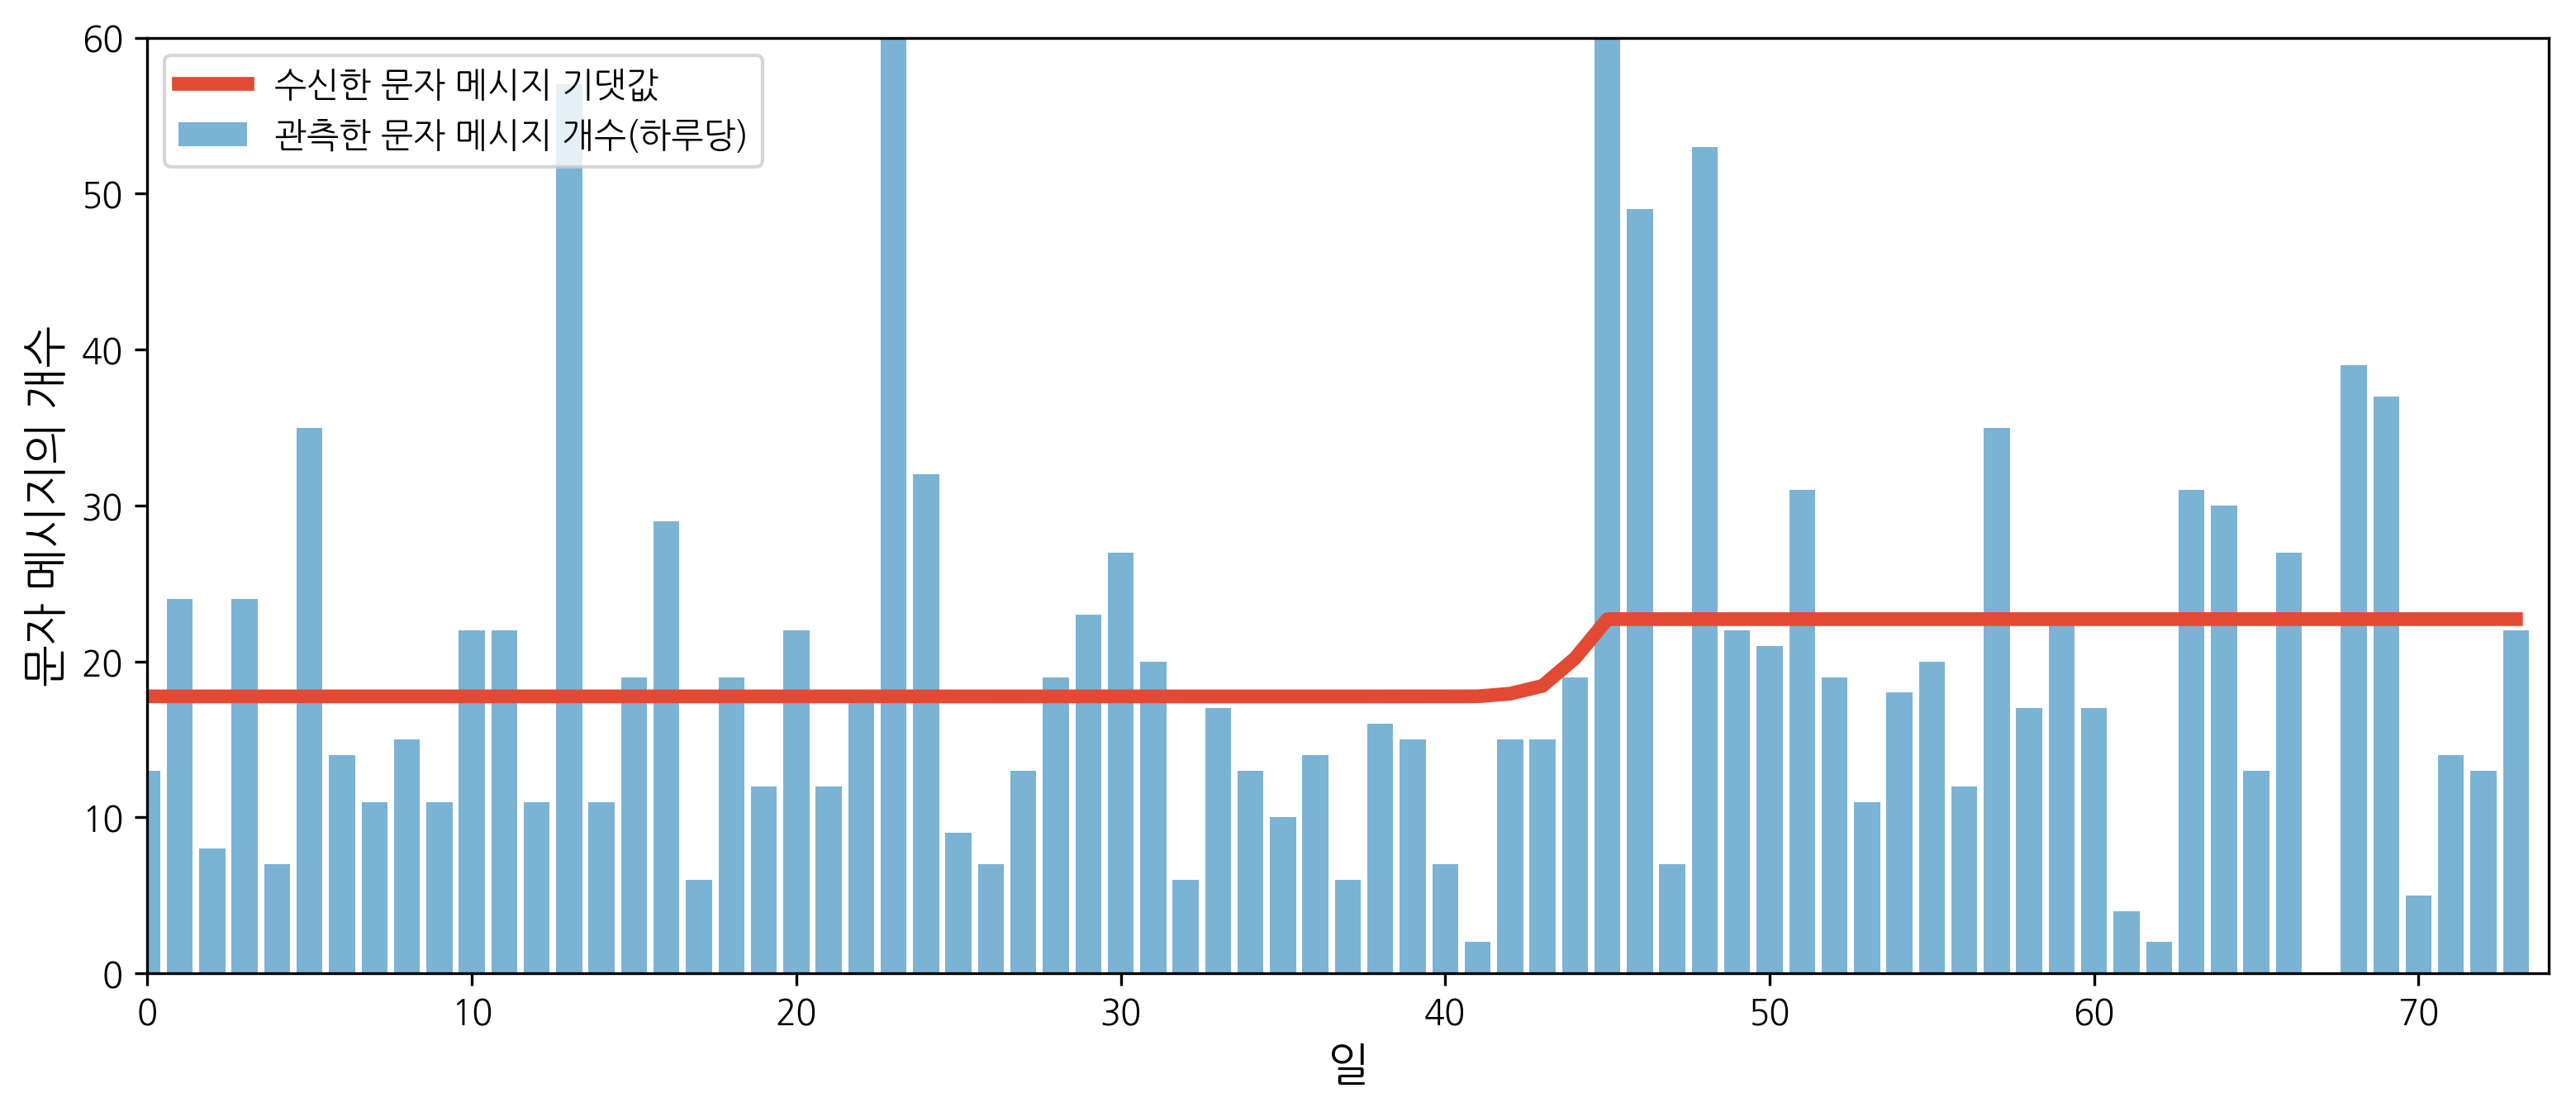

In [14]:
figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples은 
# 해당 사후확률분포에서 얻은 N 개의 표본은 가진다.
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data) # number of data points #데이터 포인트 수
for day in range(0, n_count_data):
    # ix 는'day'값이전에 발생한 스위치포인트(switchpoint)에 해당하는 
    # 모든 tau표본의 boolean 인덱스이다. 
    ix = day < tau_samples
    # 각 사후확률분포의 표본은 tau값에 해당한다. tau값은 스위치포인트 이전인지(lambda1)
    # 이후인지(lambda2)을 가리킨다
    # lambda1/2의 사후확률분포 표본을 취함으로써 우리는 모든 표본을 평균하여 그날의 
    # lambda 기대값을 얻을 수 있다.
    # 설명한 바와 같이 문자메시지 갯수 랜덤변수는 포아송분포를 따른다. 
    # 그러므로 lambda(포아송 모수)는 메시지갯수의 기대값이다.
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="수신한 문자 메시지 기댓값")
plt.xlim(0, n_count_data)
plt.xlabel("일", fontsize=13)
plt.ylabel("문자 메시지의 개수", fontsize=13)
#plt.title("수신한 문자메시지 기댓값")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="관측한 문자 메시지 개수(하루당)")

plt.legend(loc="upper left");
print (expected_texts_per_day)

In [15]:
print (lambda_1_samples < lambda_2_samples)
# Boolean array: True if lambda_1 is less than lambda_2.
# Boolean 배열 : lambda_1이 lambda_2보다 작으면 True이다.

[ True  True  True ...  True  True  True]


In [16]:
# How often does this happen?
# 얼마나 자주 발생하는 가?
print ((lambda_1_samples < lambda_2_samples).sum())
# How many samples are there?
# 표본이 얼마나 있는 가?
print (lambda_1_samples.shape[0])

29914
30000


In [17]:
# The ratio is the probability. Or, we can just use .mean:
# 비율은 확률이다. 또는 .mean을 사용할 수 있다.
print ((lambda_1_samples < lambda_2_samples).mean())

0.9971333333333333


In [18]:
# The vector abs(lambda_1_samples - lambda_2_samples) > 1 is a boolean,
# True if the values are more than 1 apart, False otherwise.
# How often does this happen? Use .mean()
# abs(lambda_1_samples - lambda_2_samples) > 1 은 boolean 벡터이다.
# 값이 1이상이면 True, 그렇치 않으면 False이다
# 얼마나 자주 발생하는 가? .mean()을 사용한다
for d in [1,2,5,10]:
    v = (abs(lambda_1_samples-lambda_2_samples)>=d).mean()
print("What is the probability the difference is larger than %d? %.2f"%(d,v))

What is the probability the difference is larger than 10? 0.00


In [19]:
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)
lambda_3 = pm.Exponential("lambda_3", alpha)
tau_1 = pm.DiscreteUniform("tau_1", lower=0, upper=n_count_data-1)
tau_2 = pm.DiscreteUniform("tau_2", lower=tau_1, upper=n_count_data)
@pm.deterministic
def lambda_(tau_1=tau_1, tau_2=tau_2,lambda_1=lambda_1, lambda_2=lambda_2, lambda_3 = lambda_3):
    out = np.zeros(n_count_data) # 데이터 포인트의 갯수
    out[:tau_1] = lambda_1 # lambda_1은 tau이전 lambda이다 
    out[tau_1:tau_2] = lambda_2
    out[tau_2:] = lambda_3 # lambda_2은 tau이후 lambda이다

    return out
observation = pm.Poisson("obs", lambda_, value=count_data,observed=True)
model = pm.Model([observation, lambda_1, lambda_2, lambda_3, tau_1,
tau_2])
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)

 [-----------------100%-----------------] 40000 of 40000 complete in 13.3 sec

In [20]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
lambda_3_samples = mcmc.trace('lambda_3')[:]
tau_1_samples = mcmc.trace('tau_1')[:]
tau_2_samples = mcmc.trace('tau_2')[:]

/home/markbaum/Python/django/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


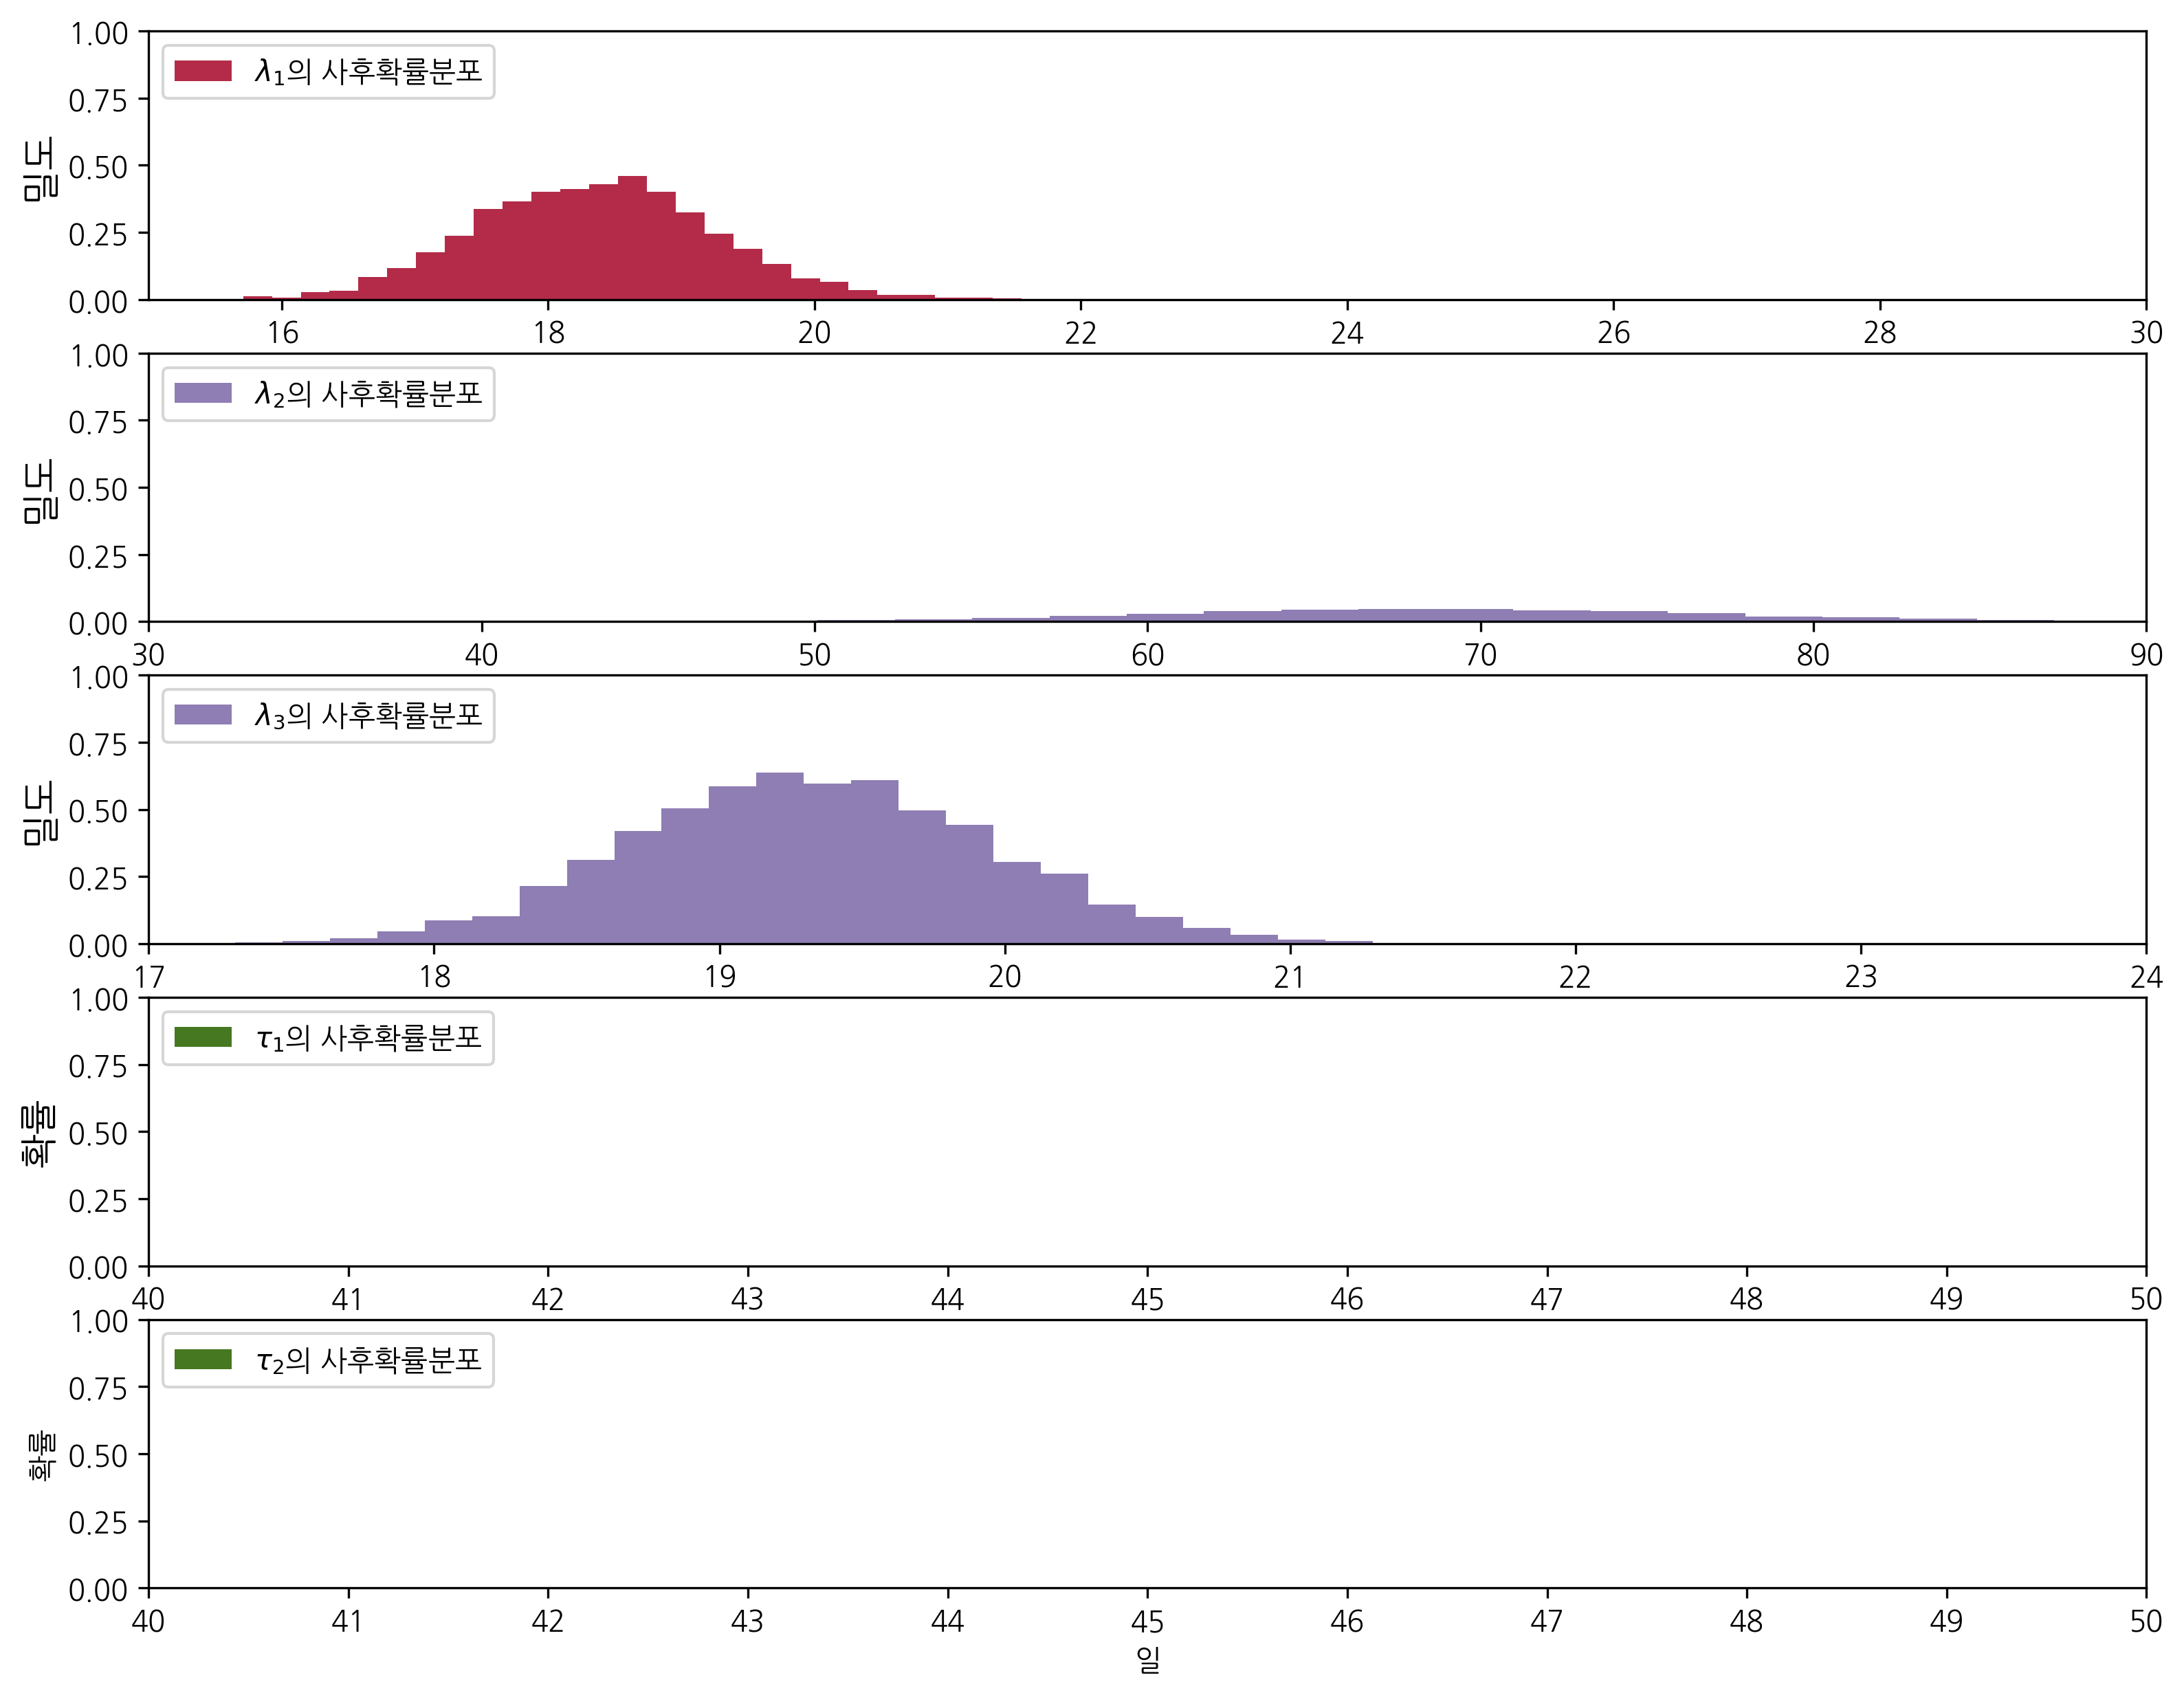

In [21]:
figsize(12.5, 10)
# histogram of the samples:
# 표본의 히스토그램
ax = plt.subplot(511)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$\lambda_1$의 사후확률분포", color="#A60628", normed=True)
plt.legend(loc="upper left")
#plt.title(r"""확장된 문자메시지 모델에서 미지의 모수 5개에 대한 사후확률분포""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ 값")
plt.ylabel("밀도", fontsize=13)

ax = plt.subplot(512)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$\lambda_2$의 사후확률분포", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([30, 90])
plt.xlabel("$\lambda_2$ 값")
plt.ylabel("밀도", fontsize=13)

ax = plt.subplot(513)
ax.set_autoscaley_on(False)
plt.hist(lambda_3_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$\lambda_3$의 사후확률분포", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([17, 24])
plt.xlabel("$\lambda_3$ 값")
plt.ylabel("밀도", fontsize=13)

plt.subplot(514)
w = 1.0 / tau_1_samples.shape[0] * np.ones_like(tau_1_samples)
plt.hist(tau_1_samples, bins=n_count_data, alpha=1,
         label=r"$\tau_1$의 사후확률분포",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.xlim([40, 50])

plt.xlabel(r"일", fontsize=13)
plt.ylabel("확률", fontsize=13)

plt.subplot(515)
w = 1.0 / tau_2_samples.shape[0] * np.ones_like(tau_2_samples)
plt.hist(tau_2_samples, bins=n_count_data, alpha=1,
         label=r"$\tau_2$의 사후확률분포",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.xlim([40, 50])
plt.xlabel(r"일")
plt.ylabel("확률");

In [22]:
print (lambda_1_samples.mean())
print (lambda_1_samples.mean())

18.357165963457913
18.357165963457913


In [23]:
(lambda_2_samples-lambda_1_samples)/lambda_1_samples

array([2.56052241, 2.68668733, 3.3186583 , ..., 2.58136212, 2.20128954,
       1.95806853])

In [24]:
relative_increase_samples = (lambda_2_samples-lambda_1_samples)/lambda_1_samples
print (relative_increase_samples)

[2.56052241 2.68668733 3.3186583  ... 2.58136212 2.20128954 1.95806853]


2.761240672870063


/home/markbaum/Python/django/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


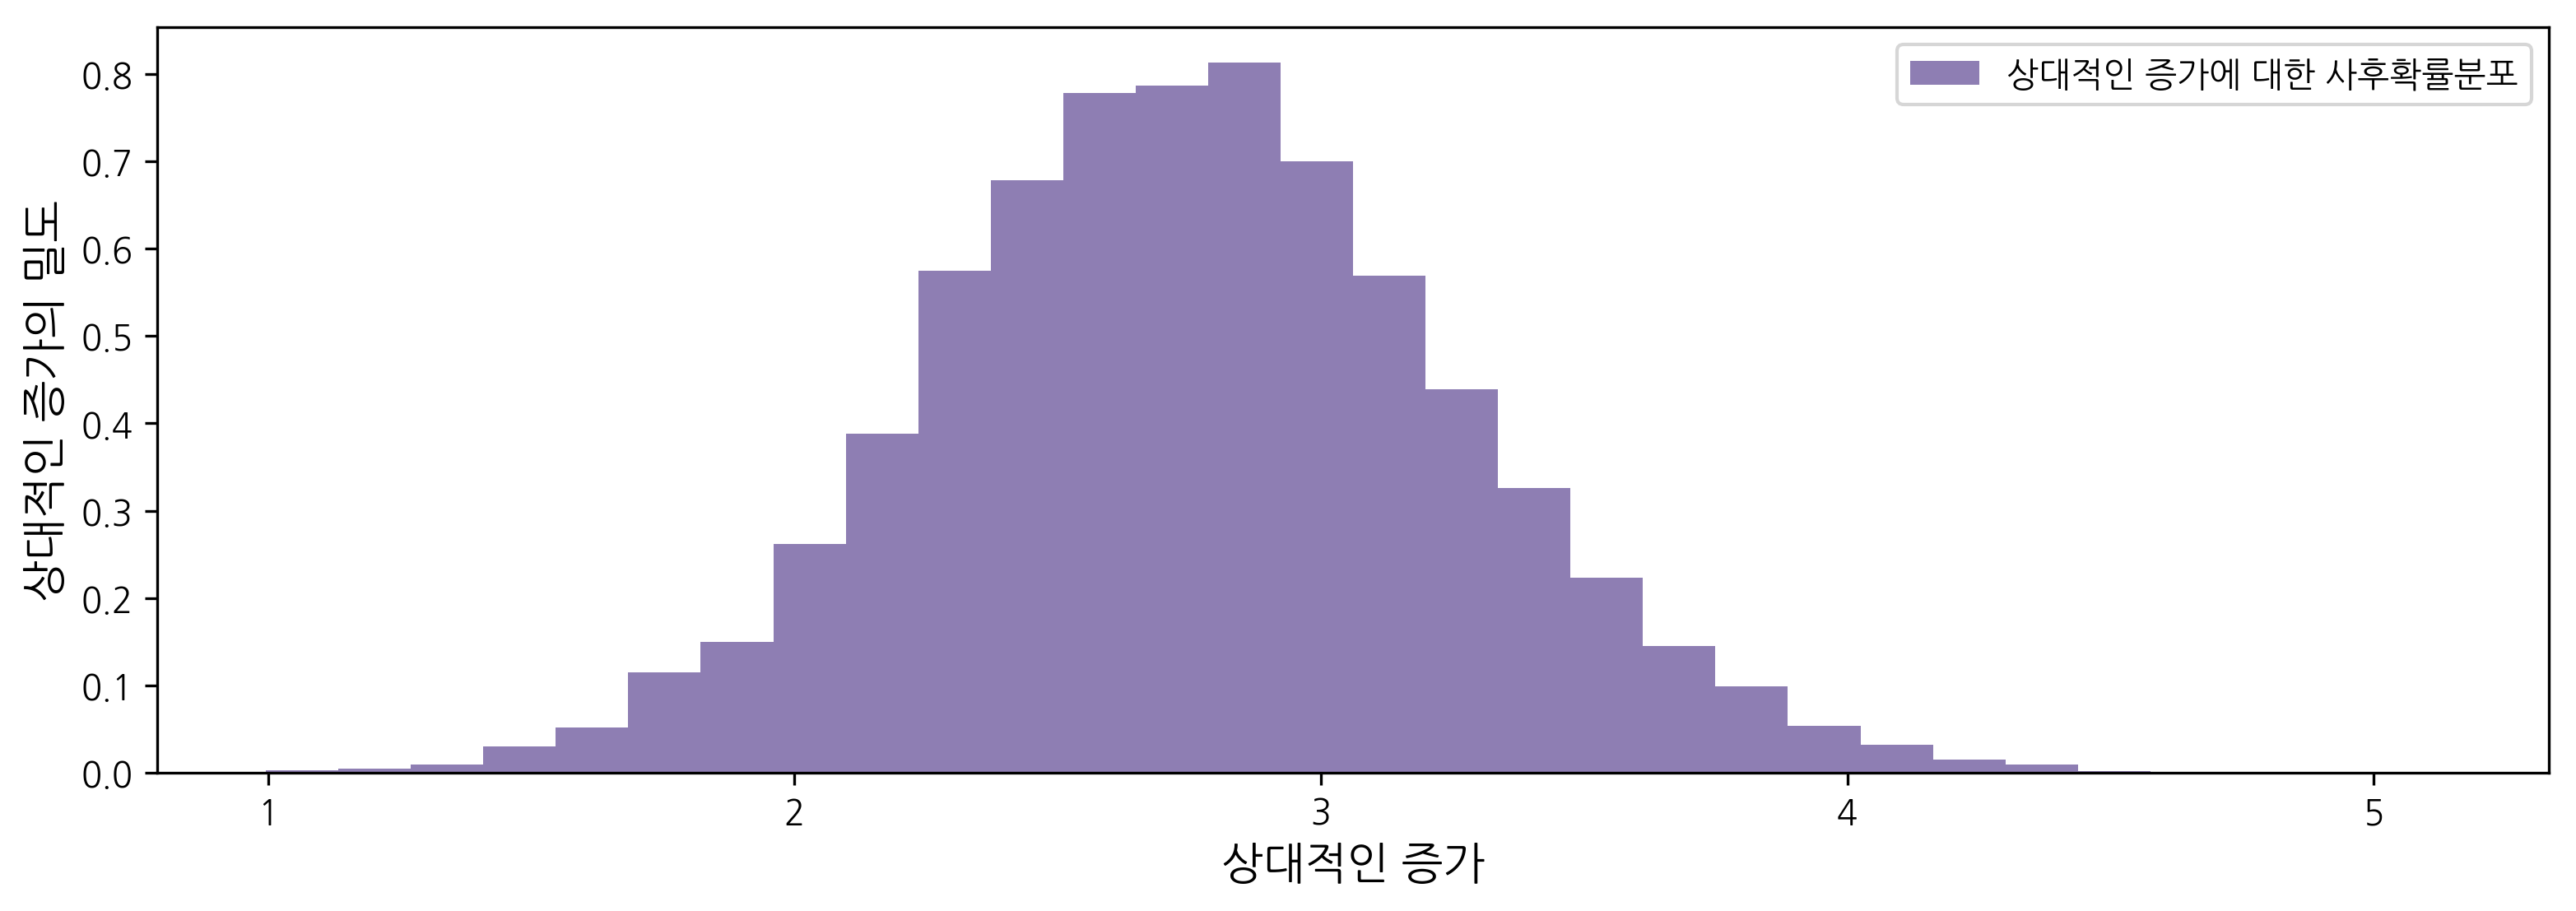

In [25]:
figsize(12.5,4)
plt.hist(relative_increase_samples, histtype='stepfilled',
bins=30, alpha=0.85, color="#7A68A6", normed=True,
label='상대적인 증가에 대한 사후확률분포')
plt.xlabel("상대적인 증가", fontsize=13)
plt.ylabel("상대적인 증가의 밀도", fontsize=13)
#plt.title("상대적인 증가에 대한 사후확률분포")
plt.legend();
print (relative_increase_samples.mean())

In [26]:
print (relative_increase_samples.mean())

2.761240672870063


In [27]:
ix = tau_samples < 45
print (lambda_1_samples[ix].mean())

18.351524721240263
